In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split#훈련 데이터셋 나누기
from sklearn.preprocessing import StandardScaler#정규화
from sklearn.decomposition import PCA #차원축소
from sklearn.ensemble import RandomForestClassifier#랜덤포레스트
irom sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.metrics import accuracy_score#정확도평가
from sklearn.metrics import classification_report#F스코어
from sklearn import metrics#ROC커브
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import warnings#경고창 무시
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\웍스컴바인\\Desktop\\work\\data_analysis\\dataAnalysis_Practice\\SUV_Purchase.csv', encoding='utf-8')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [58]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [3]:
# # UserID 삭제
# df.drop(['User ID'], axis=1)

In [4]:
# 더미변수화(원하는 컬럼만)
df2 = pd.get_dummies(df, columns = ['Gender'])
df2

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
#PCA를 위한 Feature Scaling(age, salary) 
# 설명 가능한 변수의 분산량이 고르게 들어감
# sc = StandardScaler()
# df2[['Age','EstimatedSalary']] = sc.fit_transform(df2.loc[:, ['Age','EstimatedSalary'])
# df2.head()

In [49]:
# Feature Scaling 여성, 남성까지 했을 때 정확도가 82~85%로 떨어짐
# sc = StandardScaler()
# df2[['Age','EstimatedSalary','Gender_Female','Gender_Male']] = sc.fit_transform(df2.loc[:, ['Age','EstimatedSalary','Gender_Female','Gender_Male']])
# df2.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,-1.020204,1.020204
1,-0.253587,-1.460681,0,-1.020204,1.020204
2,-1.113206,-0.785290,0,0.980196,-0.980196
3,-1.017692,-0.374182,0,0.980196,-0.980196
4,-1.781797,0.183751,0,-1.020204,1.020204


In [5]:
# 데이터셋 구분 
data = df2[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
target= df2['Purchased']

## 차원축소(PCA)

In [7]:
# 훈련 데이터셋 나누기
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [6]:
pca = PCA(n_components = 2)
train_input = pca.fit_transform(train_input)
test_input = pca.transform(test_input)
## results of 
print('Variance Captured by PCA')
for i in np.arange(pca.n_components_):
    print("PC{0:d}: {1:.1f}%".format(i+1, 100*pca.explained_variance_ratio_[i]))

Variance Captured by PCA
PC1: 100.0%
PC2: 0.0%


## 랜덤포레스트

In [83]:
# 하이퍼 파라미터
params = { 'n_estimators' : [10,50,100],
            'max_depth':[6,8,10,12],
            'min_samples_leaf':[8,12,18],
            'min_samples_split':[8,16,20]
            }

In [84]:
# 그래드 서치
rf = RandomForestClassifier(random_state=0, n_jobs=1)

In [85]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=1)

In [89]:
grid_cv.fit(train_input, train_target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1, random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 50, 100]})

In [57]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9031


In [8]:
#랜덤포레스트 모델 생성
#최적의 하이퍼 파라미터 n_estimators 100보다 10이 더 예측 정확도가 높음
rfc = RandomForestClassifier(n_estimators = 10, 
                                max_depth = 6,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                random_state = 0,
                                n_jobs = 1,
                                oob_score=True
                            )
rfc.fit(train_input, train_target)
# 훈련 데이터 평가
print(classification_report(train_target, rfc.predict(train_input), target_names = ['구매결정x(0)', '구매결정o(1)']))

              precision    recall  f1-score   support

    구매결정x(0)       0.96      0.91      0.93       205
    구매결정o(1)       0.85      0.93      0.89       115

    accuracy                           0.92       320
   macro avg       0.90      0.92      0.91       320
weighted avg       0.92      0.92      0.92       320



In [9]:
# 테스트 데이터 평가
print(classification_report(test_target, rfc.predict(test_input), target_names = ['구매결정x(0)', '구매결정o(1)']))

              precision    recall  f1-score   support

    구매결정x(0)       0.96      0.90      0.93        52
    구매결정o(1)       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [10]:
rfc_pred = rfc.predict(test_input)
print('예측 정확도: {:.4f}'.format(accuracy_score(test_target,rfc_pred)))

예측 정확도: 0.9125


In [11]:
# 특성 중요도
print(rfc.feature_importances_)
# age, salary 순으로 

[0.56614499 0.42613065 0.00243204 0.00529233]


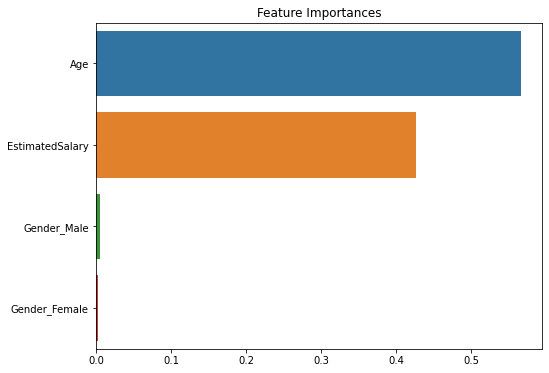

In [28]:
# 특성 중요도 시각화
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df2[['Age','EstimatedSalary','Gender_Female','Gender_Male']].columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## ROC Curve

In [12]:
def buildROC(test_target,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(test_target,test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

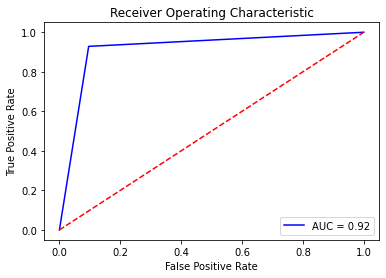

In [95]:
buildROC(test_target,rfc_pred)

## SUV 구매 결정 여부 실제로 예측해보기

### case1 나이 20세, 연봉 1만달러, 여성 ->구매 x

In [39]:
rfc.predict([[20,10000,1,0]])

array([0], dtype=int64)

### case2 나이 40세, 연봉 10만달러, 여성->구매 o

In [27]:
rfc.predict([[40,100000,1,0]])

array([1], dtype=int64)

### case3 나이 25세, 연봉 5만달러, 남성->구매 x

In [35]:
rfc.predict([[25,50000,0,1]])

array([0], dtype=int64)

### case4 나이 25세, 연봉 10만달러, 남성->구매 o

In [38]:
rfc.predict([[25,100000,0,1]])

array([1], dtype=int64)

### case5 나이 50세, 연봉 3만달러, 여성->구매 o

In [57]:
rfc.predict([[50,30000,1,0]])

array([1], dtype=int64)

### 의견
- 나이가 많고 소득이 많을수록 SUV를 구매 결정할 확률이 높다
- 나이가 많고 소득이 적더라도 SUV를 구매 결정할 확률이 높다
- 나이가 젊더라도 소득이 많다면 SUV를 구매 결정할 확률이 높다
- 성별은 구매 결정에 영향이 거의 없다